In [2]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [3]:
# Step 1: Load and clean data
from ucimlrepo import fetch_ucirepo
adult = fetch_ucirepo(id=2)
df = pd.concat([adult.data.features, adult.data.targets], axis=1)

df['income'] = df['income'].str.strip().str.replace('.', '', regex=False)
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Step 2: Split features and target
selected_features = [
    'age', 'capital-gain', 'capital-loss', 'hours-per-week', 'education-num',
    'workclass', 'marital-status', 'occupation', 'relationship', 'sex'
]
X = df[selected_features]
y = df['income']

In [4]:
# Step 3: Separate numeric and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# Step 4: Preprocess numeric columns
scaler = StandardScaler()
X_num = scaler.fit_transform(X[num_cols])

# Step 5: Preprocess categorical columns
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_cat = encoder.fit_transform(X[cat_cols])

# Step 6: Combine numeric and categorical data
X_processed = np.hstack((X_num, X_cat))


# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, stratify=y, random_state=42)

In [5]:
# Logistic Regression Model

# Step 8: Logistic Regression with basic hyperparameter tuning
log_reg_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}

log_reg = LogisticRegression(random_state=42)
log_reg_grid_search = GridSearchCV(log_reg, log_reg_param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
log_reg_grid_search.fit(X_train, y_train)

# Step 9: Evaluate best model
best_log_reg = log_reg_grid_search.best_estimator_
log_reg_y_pred = best_log_reg.predict(X_test)

print("Best Logistic Regression Parameters:", log_reg_grid_search.best_params_)
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, log_reg_y_pred))
print(classification_report(y_test, log_reg_y_pred))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END C=0.01, class_weight=None, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, class_weight=None, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, class_weight=None, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, class_weight=None, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.01, class_weight=None, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.01, class_weight=None, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, class_weight=None, penalty=l2, solver=saga; total time=   0.2s
[CV] END .C=0.01, class_weight=None, penalty=l1, solver=saga; total time=   0.2s
[CV] END .C=0.01, class_weight=None, penalty=l1, solver=saga; total time=   0.2s
[CV] END .C=0.01, class_weight=None, penalty=l1, solver=saga; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.01,

/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=1, class_weight=None, penalty=l1, solver=saga; total time=   0.9s
[CV] END C=1, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ....C=1, class_weight=None, penalty=l1, solver=saga; total time=   1.3s
[CV] END C=1, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.7s
[CV] END ....C=1, class_weight=None, penalty=l1, solver=saga; total time=   1.3s
[CV] END ....C=1, class_weight=None, penalty=l2, solver=saga; total time=   0.8s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=1, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=1, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=1, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END ....C=1, class_weight=None, penalty=l2, solver=saga; total time=   1.0s
[CV] END ....C=1, class_weight=None, penalty=l2, solver=saga; total time=   1.0s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, penalty=l1, solver=saga; total time=   1.0s
[CV] END C=1, class_weight=balanced, penalty=l1, solver=saga; total time=   1.4s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, penalty=l1, solver=saga; total time=   0.9s
[CV] END C=10, class_weight=None, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END C=10, class_weight=None, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=1, class_weight=balanced, penalty=l2, solver=saga; total time=   0.9s
[CV] END C=10, class_weight=None, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=10, class_weight=None, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=1, class_weight=balanced, penalty=l2, solver=saga; total time=   1.1s
[CV] END C=10, class_weight=None, penalty=l1, solver=liblinear; total time=   1.0s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, penalty=l2, solver=saga; total time=   1.2s
[CV] END C=10, class_weight=None, penalty=l1, solver=liblinear; total time=   1.1s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=10, class_weight=None, penalty=l1, solver=saga; total time=   1.0s
[CV] END ...C=10, class_weight=None, penalty=l1, solver=saga; total time=   1.4s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=10, class_weight=None, penalty=l2, solver=saga; total time=   0.8s
[CV] END ...C=10, class_weight=None, penalty=l2, solver=saga; total time=   0.9s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, class_weight=None, penalty=l2, solver=saga; total time=   0.9s
[CV] END ...C=10, class_weight=None, penalty=l1, solver=saga; total time=   1.3s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=liblinear; total time=   1.0s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.9s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, penalty=l1, solver=saga; total time=   1.1s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=saga; total time=   0.9s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=saga; total time=   1.0s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, class_weight=balanced, penalty=l2, solver=saga; total time=   0.7s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=saga; total time=   0.7s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=saga; total time=   0.7s
Best Logistic Regression Parameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Test Accuracy: 0.8425649530127142
              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      6803
        >50K       0.73      0.58      0.65      2242

    accuracy                           0.84      9045
   macro avg       0.80      0.76      0.77      9045
weighted avg       0.84      0.84      0.84      9045



In [6]:
# Random Forest Model

# Step 8: Random Forest with basic hyperparameter tuning
rf_param_grid = {
    'n_estimators': [100, 200],             # Number of trees
    'max_depth': [None, 10, 20],            # Allow full depth and a couple restricted options
    'min_samples_split': [2, 5],            # Regular vs. slightly conservative
    'min_samples_leaf': [1, 2],             # Prevent very small leaves
    'class_weight': [None, 'balanced']      # Handle class imbalance
}

rf = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Step 9: Evaluate best model
best_rf = rf_grid_search.best_estimator_
rf_y_pred = best_rf.predict(X_test)

print("Best Random Forest Parameters:", rf_grid_search.best_params_)
print("Random Forest Test Accuracy:", accuracy_score(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.5s
[CV] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.5s
[CV] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.5s
[CV] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END class_weight=None, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END class_weight=None, max_depth=None, min_samples_leaf=2, min_samples_split=2,

In [7]:
# Step 8: Train MLPClassifier with GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (128, 64), (32, 32, 16)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

nn = MLPClassifier(random_state=42)
nn_grid_search = GridSearchCV(nn, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
nn_grid_search.fit(X_train, y_train)

# Step 9: Evaluate the best model
best_nn = nn_grid_search.best_estimator_
nn_y_pred = best_nn.predict(X_test)

print("Best Neural Network Parameters:", nn_grid_search.best_params_)
print("Neural Network Test Accuracy:", accuracy_score(y_test, nn_y_pred))
print(classification_report(y_test, nn_y_pred))

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   3.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   3.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   3.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   4.8s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   7.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   7.5s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic 

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   7.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   7.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   7.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   7.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   5.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   6.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   6.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   6.5s
[CV] END activation=re

/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=  11.8s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=  11.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   9.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=  11.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=  11.2s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=  11.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=  10.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   9.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   9.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=  10.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=  11.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=  12.1s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=  22.0s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=  22.3s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=  22.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=adam; total time=   8.9s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=  22.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=  18.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=  22.2s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=sgd; total time=   5.7s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=  22.3s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=adam; total time=   8.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=  16.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=  16.2s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=adam; total time=   9.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=sgd; total time=   7.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=sgd; total time=   6.1s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   3.1s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=adam; total time=   8.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=adam; total time=   9.1s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   6.7s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   6.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=sgd; total time=   7.7s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   3.0s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=sgd; total time=   7.9s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   6.8s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   3.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=adam; total time=   9.0s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=sgd; total time=   8.0s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   6.7s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   4.7s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   4.8s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   4.6s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   6.9s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   6.9s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   6.0s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   5.9s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=  10.7s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=  10.7s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   6.8s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=  10.9s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=  10.6s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=  10.6s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   8.9s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   8.8s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=  10.9s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   9.9s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=  12.3s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=  10.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=  11.0s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=  22.0s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=  22.3s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=  22.6s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=adam; total time=   9.2s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=  22.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=  22.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=  18.1s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=sgd; total time=   5.4s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=  22.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=  17.0s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=  15.6s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=adam; total time=   8.9s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=adam; total time=   9.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=sgd; total time=   7.7s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=sgd; total time=   6.0s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=adam; total time=   8.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   3.0s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=adam; total time=   8.8s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=sgd; total time=   7.7s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=adam; total time=   8.8s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=sgd; total time=   8.1s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   6.7s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=sgd; total time=   8.0s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   7.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   6.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   3.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   3.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   4.7s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   6.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   4.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   4.7s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   6.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   6.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   6.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   5.9s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=  10.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=  10.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=  10.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   6.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   8.8s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=  10.6s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=  10.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   8.9s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=  10.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   9.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=  11.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=  11.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=  10.1s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=  21.7s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=  22.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=  22.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=adam; total time=   8.3s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=  21.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=  17.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=  22.1s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=  21.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=sgd; total time=   5.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=  16.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=sgd; total time=   5.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=  15.5s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=adam; total time=   8.9s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=adam; total time=   8.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=sgd; total time=   6.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=adam; total time=   8.1s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=adam; total time=   8.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=sgd; total time=   7.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=sgd; total time=   7.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   3.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=adam; total time=   8.9s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=sgd; total time=   8.0s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   6.8s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   7.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   3.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   2.6s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   7.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   4.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   5.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   4.7s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   7.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   7.0s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   7.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   6.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   6.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   7.6s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=  10.8s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=  11.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=  11.4s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=  10.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   9.1s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=  11.3s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=  11.4s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=  10.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   9.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=  11.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=  17.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=  15.1s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=  23.6s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=  23.7s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=  23.8s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=adam; total time=   9.5s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=  23.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=sgd; total time=   5.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=  24.0s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=  23.9s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=  22.3s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=adam; total time=   9.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=  17.5s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=adam; total time=   9.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=sgd; total time=   5.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=sgd; total time=   6.6s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=adam; total time=   9.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=adam; total time=   9.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=sgd; total time=   7.5s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=adam; total time=   9.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=  21.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=sgd; total time=   7.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   6.9s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   7.2s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=sgd; total time=   8.4s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   2.9s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   2.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   3.3s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   7.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   5.0s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   5.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   6.0s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   8.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   8.5s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   8.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   7.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   8.4s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=  11.9s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   7.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=  12.3s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=  12.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   9.5s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=  11.5s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=  11.5s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=  11.6s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=  10.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   9.9s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=  11.8s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=  13.1s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=  17.6s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=  23.1s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=  23.8s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=  24.1s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=adam; total time=   9.7s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=sgd; total time=   5.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=  23.9s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=  23.2s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=  25.0s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=  22.4s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=adam; total time=   9.6s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=sgd; total time=   5.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=adam; total time=   9.5s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=  17.8s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=sgd; total time=   6.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=  19.5s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=adam; total time=   9.5s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=adam; total time=   9.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=sgd; total time=   7.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   3.1s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=sgd; total time=   7.7s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=adam; total time=   9.7s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   7.5s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   7.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   2.7s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=constant, solver=sgd; total time=   3.1s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=sgd; total time=   9.0s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=constant, solver=adam; total time=   7.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   5.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   4.9s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=sgd; total time=   5.3s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   7.2s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   7.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64,), learning_rate=adaptive, solver=adam; total time=   7.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   6.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   4.8s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=  11.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=  11.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=sgd; total time=   7.1s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=constant, solver=adam; total time=  11.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   9.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=   7.8s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=  11.2s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=  11.2s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=adam; total time=  11.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 32), learning_rate=adaptive, solver=sgd; total time=  10.6s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=  11.9s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=  11.8s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=sgd; total time=  18.0s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=  24.1s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=  24.3s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=constant, solver=adam; total time=  24.8s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=adam; total time=   9.9s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=  24.0s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=  24.4s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=adam; total time=  24.0s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=sgd; total time=   5.5s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=  23.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=  17.5s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=adam; total time=   9.7s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=sgd; total time=   5.4s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=adam; total time=   9.6s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(128, 64), learning_rate=adaptive, solver=sgd; total time=  18.0s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32, 16), learning_rate=constant, solver=sgd; total time=   6.4s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=adam; total time=   8.7s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=sgd; total time=   6.8s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=adam; total time=   8.5s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=adam; total time=   8.6s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=sgd; total time=   6.5s


/Users/Carl/Storage/College/3rd_Year/Spring/ECS_171/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32, 16), learning_rate=adaptive, solver=sgd; total time=   7.2s
Best Neural Network Parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (64,), 'learning_rate': 'constant', 'solver': 'adam'}
Neural Network Test Accuracy: 0.8485351022664456
              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      6803
        >50K       0.75      0.59      0.66      2242

    accuracy                           0.85      9045
   macro avg       0.81      0.76      0.78      9045
weighted avg       0.84      0.85      0.84      9045



In [8]:
# Save the models
joblib.dump(scaler, 'pkl/scaler.pkl')
joblib.dump(encoder, 'pkl/encoder.pkl')
joblib.dump(best_log_reg, 'pkl/log_reg_model.pkl')
joblib.dump(best_rf, 'pkl/rf_model.pkl')
joblib.dump(best_nn, 'pkl/nn_model.pkl')

['pkl/nn_model.pkl']

In [9]:
# Load models
scaler = joblib.load('pkl/scaler.pkl')
encoder = joblib.load('pkl/encoder.pkl')
log_reg = joblib.load('pkl/log_reg_model.pkl')
rf = joblib.load('pkl/rf_model.pkl')
nn = joblib.load('pkl/nn_model.pkl')

# Predict
log_reg_preds = log_reg.predict(X_test)
rf_preds = rf.predict(X_test)
nn_preds = nn.predict(X_test)

# Create a function to evaluate each model
def evaluate_model(name, y_true, y_pred):
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_true, y_pred, average='weighted', zero_division=0),
        'F1 Score': f1_score(y_true, y_pred, average='weighted', zero_division=0)
    }

# Evaluate all models
results = [
    evaluate_model("Logistic Regression", y_test, log_reg_preds),
    evaluate_model("Random Forest", y_test, rf_preds),
    evaluate_model("Neural Network", y_test, nn_preds)
]

# Display results as a DataFrame
df_results = pd.DataFrame(results)
print(df_results)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.842565   0.835543  0.842565  0.836466
1        Random Forest  0.858375   0.852749  0.858375  0.851615
2       Neural Network  0.848535   0.841912  0.848535  0.842196


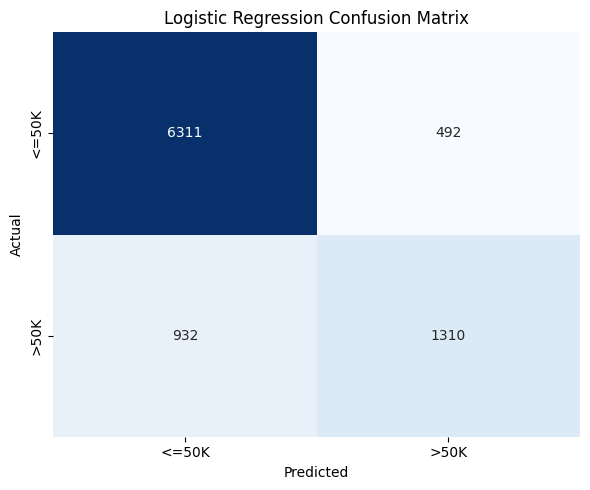

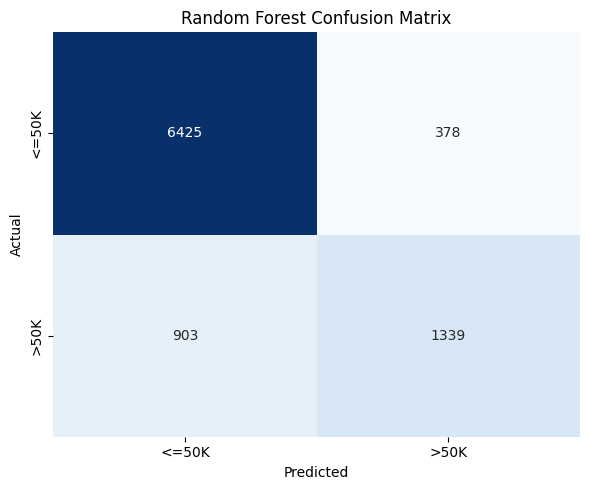

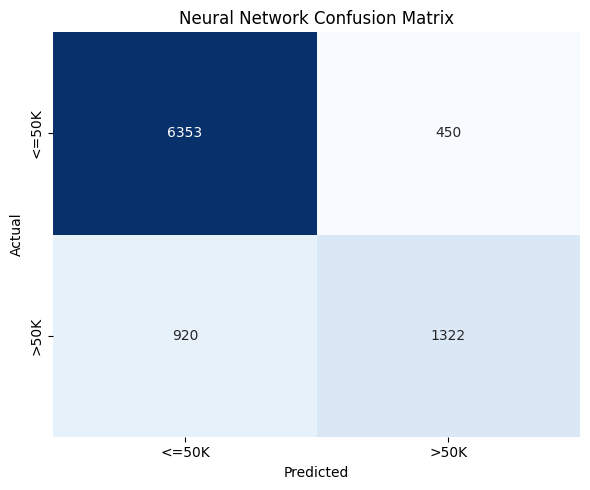

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define model predictions and labels
model_preds = {
    'Logistic Regression': log_reg_preds,
    'Random Forest': rf_preds,
    'Neural Network': nn_preds
}

# Get unique class names for confusion matrix labels
class_names = sorted(list(set(y_test)))

# Plot each confusion matrix in its own figure
for name, preds in model_preds.items():
    cm = confusion_matrix(y_test, preds)
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()